Trained on Windows 10, necessitates the installation of Tensorflow, numpy, matplotlib and opencv.
To being able to save the weights, a folder "method3" should be created on the disk. 

<h3>Ressources used for the following code</h3>
<br>1. https://www.codeproject.com/Articles/5278503/Making-TensorFlow-Models-Portable-Using-ONNX <br>
    2. https://learning.oreilly.com/library/view/deep-learning-with/9781617294433/OEBPS/Text/05.xhtml <strong>Chap. 5, Deep Learning with Python by François Chollet.</strong>

In [1]:
import tensorflow as tf
import os
import random as rd
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

<h2>Loading and preprocessing</h2>

In [3]:
IMAGE_DIR = 'training/'
dir_list = os.listdir(IMAGE_DIR)
X,y = [], []

In [4]:
for dir_name in dir_list:
    file_names = os.listdir(IMAGE_DIR + dir_name)
    for file_name in file_names:
        img = cv.imread(IMAGE_DIR + dir_name + "/" + file_name, cv.IMREAD_GRAYSCALE)
        #img.astype('float') look into it later
        X.append(img)
        y.append(int(dir_name))




<h3>Shuffling and scaling the images</h3>

In [ ]:
indexes = list(range(len(X)))
rd.shuffle(indexes)

X = np.array(X,dtype='float')
X = np.expand_dims(X, axis=3)

y = tf.keras.utils.to_categorical(y, num_classes=10)
y = np.array(y)
X /= 255.
X,y = X[indexes], y[indexes]

In [ ]:
print(y.shape)
print(y[0])

<h3>Splitting dataset</h3>

In [5]:
train_split, val_split = .9, 0.07
n_train = int(train_split * len(X))
n_val = int(val_split * len(X))
X_train, y_train = X[:n_train], y[:n_train]
X_val, y_val = X[n_train:n_train + n_val], y[n_train:n_train + n_val]
X_test, y_test = X[n_train + n_val:], y[n_train + n_val:]

In [6]:
print("Shape X_train: ", X_train.shape)
print("Shape X_val: ", X_val.shape)
print("Shape X_test: ", X_test.shape)

Shape X_train:  (54000, 28, 28, 1)
Shape X_val:  (4200, 28, 28, 1)
Shape X_test:  (1800, 28, 28, 1)


<h2>Defining the model</h2>

In [13]:
def model_create(input_shape):
    model = tf.keras.Sequential(name='nn_model')
    
    

    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu', padding='valid'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu', padding='valid'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(tf.keras.layers.Conv2D(64, 3, activation='relu', padding='valid'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))

    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=1e-2), loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')
    model.build(input_shape)
    
    model.summary()
    return model

In [14]:
my_model = model_create((None,28,28,1))

Model: "nn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0  

In [15]:
history = my_model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val,y_val), validation_batch_size=64)
my_model.save('method3/model')

2021-11-07 15:12:36.833904: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
844/844 [==============================] - 29s 32ms/step - loss: 0.4205 - accuracy: 0.1062 - val_loss: 0.3258 - val_accuracy: 0.0960
Epoch 2/50
844/844 [==============================] - 27s 32ms/step - loss: 0.3292 - accuracy: 0.1204 - val_loss: 0.3240 - val_accuracy: 0.0969
Epoch 3/50
844/844 [==============================] - 28s 34ms/step - loss: 0.3267 - accuracy: 0.1400 - val_loss: 0.3216 - val_accuracy: 0.3090
Epoch 4/50
844/844 [==============================] - 28s 33ms/step - loss: 0.3233 - accuracy: 0.1740 - val_loss: 0.3171 - val_accuracy: 0.3543
Epoch 5/50
844/844 [==============================] - 28s 33ms/step - loss: 0.3164 - accuracy: 0.2286 - val_loss: 0.3041 - val_accuracy: 0.3855
Epoch 6/50
844/844 [==============================] - 27s 32ms/step - loss: 0.2937 - accuracy: 0.3171 - val_loss: 0.2631 - val_accuracy: 0.5093
Epoch 7/50
844/844 [==============================] - 27s 32ms/step - loss: 0.2488 - accuracy: 0.4741 - val_loss: 0.2123 - val_accuracy:

<h2>Plotting accuracy and loss</h2>

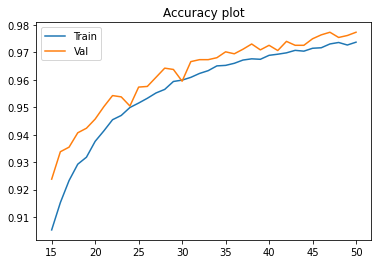

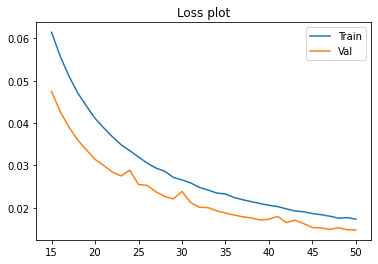

In [18]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(range(15, len(acc) + 1), acc[14:])
plt.plot(range(15, len(val_acc) + 1), val_acc[14:])
plt.legend(['Train', 'Val'])
plt.title('Accuracy plot')
plt.show()

plt.figure()

plt.plot(range(15, len(loss) + 1), loss[14:])
plt.plot(range(15, len(val_loss) + 1), val_loss[14:])
plt.legend(['Train', 'Val'])
plt.title('Loss plot')
plt.show()

In [17]:
my_model.evaluate(X_test, y_test)

57/57 [==============================] - 0s 6ms/step - loss: 0.0156 - accuracy: 0.9700


[0.01559815276414156, 0.9700000286102295]

In [20]:
!python3 -m tf2onnx.convert --saved-model "method3/model" --output "method3/cnn_model.onnx"

2021-11-07 17:56:35.217677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-07 17:56:35.217814: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3.8/runpy.py:127: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-11-07 17:56:40.902920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-07 17:56:40.903101: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-07 17:56:40.903255: 

In [21]:
loaded_model = cv.dnn.readNetFromONNX('method3/cnn_model.onnx')

In [22]:
loaded_model.setInput(X[0])

In [23]:
y_0 = loaded_model.forward()

In [24]:
print(y_0)

[[6.2908832e-08 2.6314289e-08 9.9999619e-01 3.6687018e-06 1.6972680e-12
  1.7612464e-10 2.9059966e-11 1.1049802e-10 5.3607582e-08 4.5016380e-13]]


In [25]:
np.argmax(y_0)

2

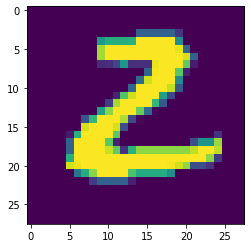

In [26]:
plt.imshow(X[0])